# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

You should save and upload your model to the seafile link we provided to you. Please name the model file as `{repository_name}-MNIST.h5`. For example, if your repository is FDS21-M0, you should name the model file as `FDS21-M0-MNIST.h5`

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11501568/11490434 [==============================] - 0s 0us/step


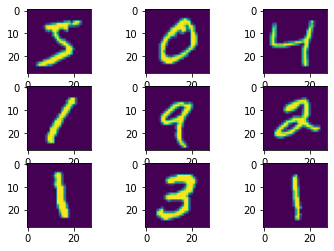

(60000, 28, 28)

In [2]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape


In [3]:
# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one-hot encoding for the 10 classes of digits
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [4]:
# TODO: Build your model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(100, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 21s 7ms/step - loss: 0.1112 - accuracy: 0.9654 - val_loss: 0.0614 - val_accuracy: 0.9810
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0506 - val_accuracy: 0.9846
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0253 - accuracy: 0.9914 - val_loss: 0.0504 - val_accuracy: 0.9872
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0526 - val_accuracy: 0.9876
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0445 - val_accuracy: 0.9906
Epoch 7/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0432 - val_ac

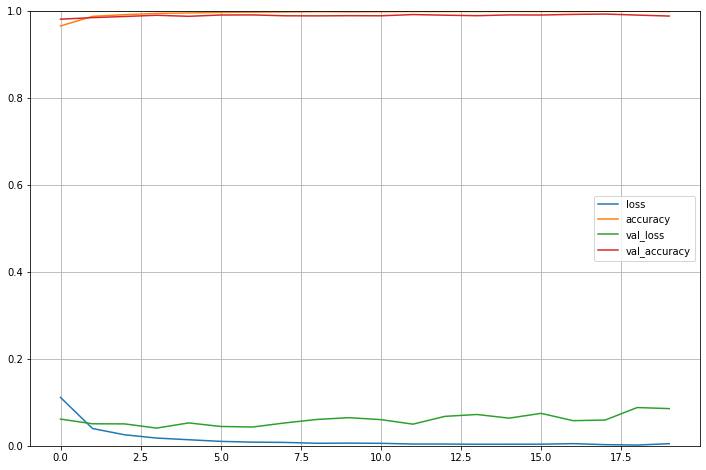

In [9]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
model.save('FDS21-M62-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [14]:
model = keras.models.load_model("FDS21-M62-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0561 - accuracy: 0.9918


[0.056099262088537216, 0.9918000102043152]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met. 

In our CNN model we included convolutional and pooling layers for the feature extraction. We trained a model with two convolutional layers, this keeps the model simple and lead to a very high accuracy of 99%. The first layer has 32 filters of size 3 and the second one has 64 filters of size 3. Both layers using ReLU activation function and He uniform weight initialization which are both best practices. Each of the convolutional layer is followed by a max pooling. After the second one the fully connected layers are started with flatten() to provide features to the classifier. 

Before getting to the output layer, we added a dense layer with 100 nodes to interpret the features. Since we have need to classify our images into 10 classes, we need an output layer with 10 nodes which predict the probability of an image belonging to each class. For this we use the softmax activation function. 

As this is a multiclass classification problem, we use the categorical cross-entropy loss function, which will be optimized using Adam. 

We also tried using batch normalization to standardize the output and speed up the learning, but it did not offer any benefit in this case, it even decreased a bit the accuracy. 
Therefore, we kept the model without batch normalization, as it already has an accuracy of over 99% with a loss of around 5%. 